In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from matplotlib.pyplot import imshow
import pandas as pd

### Load Data

In [2]:
numcat = 6 #number of categories
categories = ['AbdomenCT', 'BreastMRI', 'ChestCT', 'CXR', 'Hand', 'HeadCT']

In [3]:
# directory = r'./Medical_MNIST/'
# train, test = [], []
# for i in range(numcat):
#     imagearray = []
#     for image_raw in os.listdir(directory + categories[i]):
#         image_np = (np.array(Image.open(os.path.join(directory + categories[i], image_raw))).flatten())
#         image = np.append(image_np, i)
#         imagearray.append(image.astype('uint8'))
#     train += imagearray[0:int(0.8*len(imagearray))]
#     test += imagearray[int(0.8*len(imagearray)):]
# # data = np.array(imagearray)
# train = np.array(train)
# test = np.array(test)


In [4]:
# #saving data for faster loading in future
# np.save('Medical_train.npy', train)
# np.save('Medical_test.npy', test)

In [10]:
# For now we are using only a subset of train and test data
trainsub = 2000
testsub = 100

In [11]:
train = np.load('Medical_train.npy')
test = np.load('Medical_test.npy')
#shuffle train and test sets
np.random.shuffle(train)
np.random.shuffle(test)
#splitting into x and y - for both train and test sets
X_train, y_train = train[:trainsub, :-1], train[:trainsub, -1]
X_test, y_test = test[:testsub, :-1], test[:testsub, -1]

In [12]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2000, 4096) (2000,) (100, 4096) (100,)


In [7]:
# def cross_valid_split(dataset, folds):
#         dataset_split = []
# #         df_copy = dataset
#         fold_size = int(dataset.shape[0] // folds)
        
#         # for loop to save each fold
#         for i in range(folds):
#             fold = []
#             # while loop to add elements to the folds
#             while len(fold) < fold_size:
#                 # select a random element
#                 r = randrange(df_copy.shape[0])
#                 # determine the index of this element 
#                 index = df_copy.index[r]
#                 # save the randomly selected line 
#                 fold.append(df_copy.loc[index].values.tolist())
#                 # delete the randomly selected line from
#                 # dataframe not to select again
#                 df_copy = df_copy.drop(index)
#             # save the fold     
#             dataset_split.append(np.asarray(fold))
            
#         return dataset_split

In [8]:
# directory = r'./Medical_MNIST/'
# image_np = np.array(Image.open(os.path.join(directory + 'AbdomenCT', '000000.jpeg')))
# imshow(image_np/255, cmap = 'gray')
# # img.show()

### Data Visualization(PCA/tSNE)

Learnt the basics of PCA and tSNE from https://www.datacamp.com/community/tutorials/introduction-t-sne.
Code also adapted from the above website only

In [13]:
def medical_scatter(x, colors):
    '''Libraries use for this function ONLY'''
    import matplotlib.patheffects as PathEffects
#     %matplotlib inline

    import seaborn as sns
    '''------------------------------------'''
    
    sns.set_style('darkgrid')
    sns.set_palette('muted')
    sns.set_context("notebook", font_scale=1.5,
                    rc={"lines.linewidth": 2.5})
    
    '''----------------------------------------'''
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    print('Number of unique classes are = {}'.format(num_classes))
    palette = np.array(sns.color_palette("hls", num_classes))
#     print(palette)
    # create a scatter plot.
    f = plt.figure(figsize=(12, 12))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
#     ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.
        
        xtext, ytext = np.median(x[colors == i, :], axis=0)
#         print(i, xtext, ytext)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

### PCA - on full train dataset

In [14]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
pca_result = pca.fit_transform(X_train)

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 2.8404831886291504 seconds


__Performing the pca, we see that 58 percent of the variance in data is explained by two principle axis only__

In [15]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.46403165 0.11645582 0.04982381 0.03722879]


__visualization__

Number of unique classes are = 6


(<Figure size 864x864 with 1 Axes>,
 [Text(1231.4342333778923, 1062.6222792836302, '0'),
  Text(-4296.833817493787, 1330.344608664844, '1'),
  Text(2408.661362947768, 1348.1450602243845, '2'),
  Text(3903.9765966901386, -1152.5464714837644, '3'),
  Text(-2011.1987292376355, -2434.67068714163, '4'),
  Text(-2218.2207948624255, -62.510495328506266, '5')])

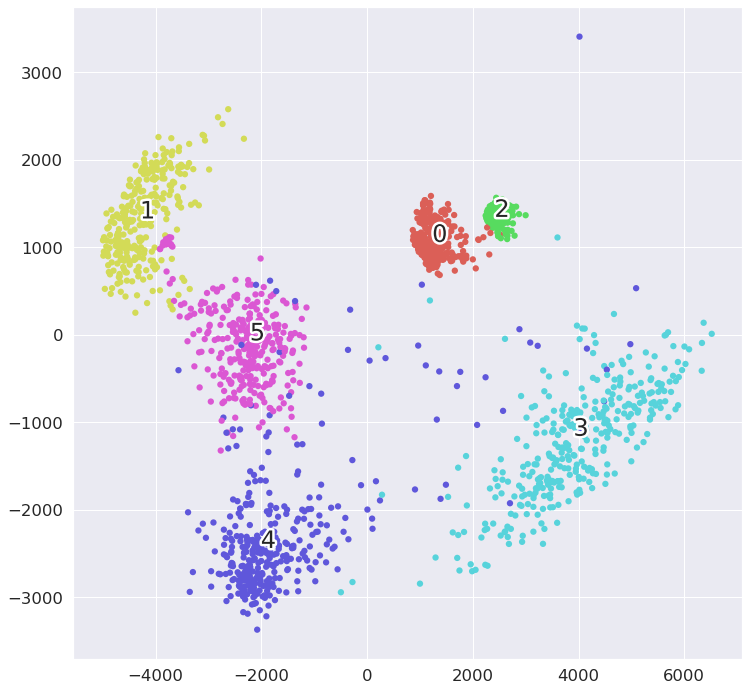

In [16]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

medical_scatter(top_two_comp.values,y_train) # Visualizing the PCA output

### tSNE

In [18]:
#using a subset of the train data
x_subset = X_train
y_subset = y_train
# x_subset = X_train[0:10000]
# y_subset = y_train[0:10000]
print(y_subset.shape)
print(np.unique(y_subset))

(2000,)
[0 1 2 3 4 5]


In [19]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.manifold import TSNE
import time
time_start = time.time()

medical_tsne = TSNE(random_state=2).fit_transform(x_subset)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 34.17584538459778 seconds


Number of unique classes are = 6


(<Figure size 864x864 with 1 Axes>,
 [Text(36.877388, 24.475, '0'),
  Text(-21.638063, -41.99527, '1'),
  Text(-5.32539, 44.512863, '2'),
  Text(2.5438962, -3.1376243, '3'),
  Text(38.213173, -29.971684, '4'),
  Text(-42.155792, 0.20624407, '5')])

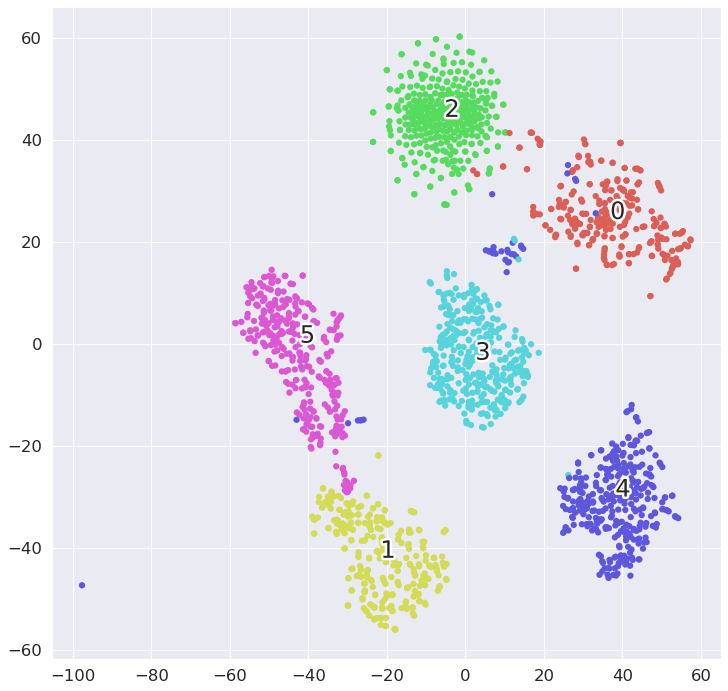

In [20]:
medical_scatter(medical_tsne, y_subset)

In [21]:
print(medical_tsne.shape)

(2000, 2)


# Strategy 1: PCA
### Do PCA on full dataset (X_train + X_test combined) and get result in low dimension. Then on the obtained features carry out all algorithms like bayes, naive bayes etc etc

In [22]:
'''The following libraries used only for PCA/tSNE as we are allowed to do so'''
from sklearn.decomposition import PCA
import time 

time_start = time.time()

pca = PCA(n_components=4)
# print(X_train.shape)
assert(np.concatenate((X_train,X_test), axis = 0).shape == (X_test.shape[0]+X_train.shape[0], X_test.shape[1]))
pca_result = pca.fit_transform(np.concatenate((X_train,X_test), axis = 0))

print('PCA done! Time elapsed: {} seconds'.format(time.time()-time_start))

PCA done! Time elapsed: 0.3559145927429199 seconds


In [23]:
print(pca_result.shape)
print(pca_result[0:10])

(2100, 4)
[[-1815.44764833 -2152.66159142  -443.24541854   365.70587919]
 [ 1090.17326171   921.88071105   -86.65944688   655.64405804]
 [-2024.64836072   247.60990216  -707.03866952 -1157.18806292]
 [ 1158.95278939  1197.31427202  -274.7080302     72.46988834]
 [-2202.50029009 -1540.42828286   146.38473724   699.4170496 ]
 [ 2407.65559524  1259.70159807  -391.42515357   668.09378066]
 [ 2427.39207444  1392.50288542  -372.58464104   571.19701141]
 [-1984.12009978   160.43398997 -1745.47974649  -275.12507088]
 [ 3733.06228252 -1077.45792464   746.53976766 -1166.25059991]
 [ 1205.38931565  1510.25287498  -323.77117535   141.80506843]]


In [24]:
pca_df = pd.DataFrame(columns = ['pca1','pca2','pca3','pca4'])

pca_df['pca1'] = pca_result[:,0]
pca_df['pca2'] = pca_result[:,1]
pca_df['pca3'] = pca_result[:,2]
pca_df['pca4'] = pca_result[:,3]

print('Variance explained per principal component: {}'.format(pca.explained_variance_ratio_))

Variance explained per principal component: [0.46328257 0.116091   0.05002549 0.037228  ]


Number of unique classes are = 7


(<Figure size 864x864 with 1 Axes>,
 [Text(1241.7752156821637, 1072.0637861223272, '0'),
  Text(-4278.637963433231, 1345.0503961669929, '1'),
  Text(2418.7567854323006, 1357.8898759246395, '2'),
  Text(3921.215678114923, -1146.8424976312645, '3'),
  Text(-2004.1113229752737, -2422.001925698285, '4'),
  Text(-2215.520907647719, -41.14240422668241, '5'),
  Text(-1637.9824834694007, 3.7959495499420832, '6')])

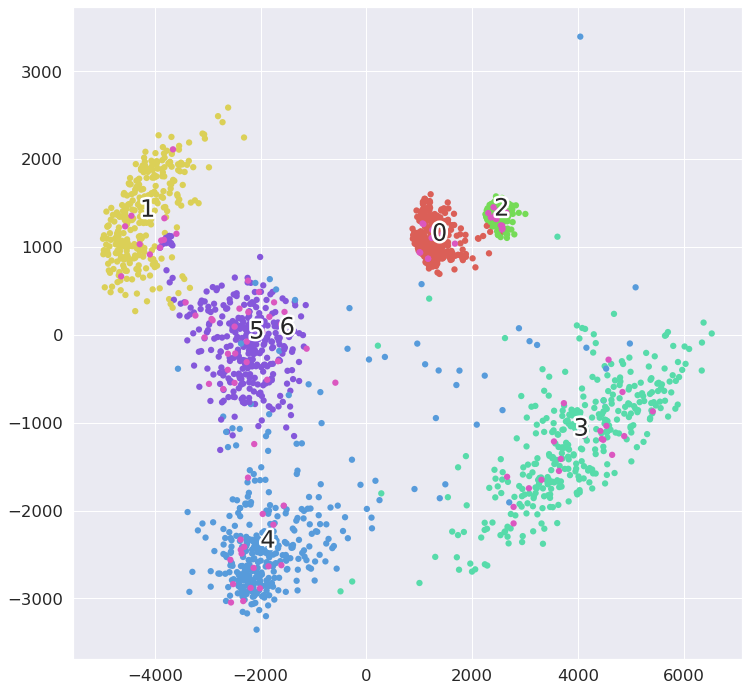

In [25]:
top_two_comp = pca_df[['pca1','pca2']] # taking first and second principal component

medical_scatter(top_two_comp.values,np.concatenate((y_train, np.ones(y_test.shape[0])*6),axis = 0)) # Visualizing the PCA outputa

In [28]:
#separating train and test data output from pca
#we are doing it for 2 pca components only currently
#WE will also normalize the data to make mean 0 and std 1 for the columns

def normalize(x):
    return (x-x.mean(axis = 0))/(x.std(axis = 0))

X_train_pca = normalize(top_two_comp.values[0:X_train.shape[0]])
X_test_pca = normalize(top_two_comp.values[0:X_test.shape[0]])

#NOTE:Y_train and y_test remain same as before
print(X_train_pca.shape, X_test_pca.shape)
# print(X_train_pca[0:10])

(2000, 2) (100, 2)


# Naive Bayes Classifier on PCA data - with Gaussian or some other density functions as density estimates of individual features for a particular class

### MLE

In [ ]:
def get_naive_params(X):
    params = []
    for i in range(numcat):
        mu = np.mean(X[:, i], axis = 0)
        var = np.var(X[:, i], axis = 0)
        params.append({'mu':mu, 'var':var})
    return params

def performance_metrics_multiclass(y_pred_test, y_test, num_classes):
    '''gives the TPR, FPR, acc, precision, recall and F1 score by comparing the 2 input arrays'''
    #First we calculate the confusion matrix of size num_class*num_class
    #NOTE: Y axis of matrix will be predicted class and x axis wll be true class
    confmat = np.zeros((numclass, num_class))
    
    for i in range(num_class):
        for j in range(num_class):
            confmat[i, j] = np.logical_and(y_pred_test == i, y_test ==j)
    
#     TP = np.logical_and(y_pred_test==y_test,y_pred_test == 1).sum()
#     FP = np.logical_and(y_pred_test!=y_test,y_pred_test == 1).sum()
#     TN = np.logical_and(y_pred_test==y_test,y_pred_test == 0).sum()
#     FN = np.logical_and(y_pred_test!=y_test,y_pred_test == 0).sum()
#     ACC = (TP+TN)/(TP+TN+FP+FN)
#     P = (TP)/(TP+FP)
#     R = (TP)/(TP+FN)
#     F1 = 2*P*R/(P+R)
#     TPR = R
#     FPR = FP/(FP+TN)
    
    return {'accuracy':ACC, 'precision':P, 'recall':R, 'F1':F1, 'TPR':TPR, 'FPR': FPR}

def getpriors(y_train):
#     priors = [X_train_0.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0]), X_train_1.shape[0]/(X_train_1.shape[0] + X_train_0.shape[0])]
    priors = [(y_train==i).sum()/y_train.shape[0] for i in range(6)]
        
    return priors

def gaussian_univariate(x, mu, var):
    """ to get the value of pdf having scalar params mu and var, @x """
    diff = (x - mu)
    pdf_x = (1/(np.sqrt(2*np.pi)))* (1/np.sqrt(var)) * (np.exp(-0.5*(diff**2)/(var)))
    return pdf_x.item()

def naive_likelihood(x, mu_array, var_array):
    '''mu_array, and var_array are d dimensional array where d is the size of x which is the number of features'''
    likelihood = 1
    for i in range(x.shape[0]):
        likelihood = likelihood * gaussian_univariate(x[i], mu_array[i], var_array[i])
    
    return likelihood
        
def predict_naive(X_test, threshold, priors, naive_params0, naive_params1):
    y_pred_test = np.zeros((X_test.shape[0], 1))
#     print(thresh)
    for i in range(X_test.shape[0]):
        likelihood_0 = naive_likelihood(X_test[i], naive_params0['mu'], naive_params0['var'])
        likelihood_1 = naive_likelihood(X_test[i], naive_params1['mu'], naive_params1['var'])
        y_pred_test[i] = 1 if ((priors[1]/priors[0])*(likelihood_1/likelihood_0) > threshold) else 0
    return y_pred_test

def ROC_naive(X_test, y_test, priors, params_0, params_1):
    FPR_list = []
    TPR_list = []
    for thresh in [2**i for i in range(-30, -2)]:
        y_pred_test = predict_naive(X_test, thresh, priors, params_0, params_1)
        performance = performance_metrics(y_pred_test, y_test)
        FPR_list.append(performance['FPR'])
        TPR_list.append(performance['TPR'])
    
    for thresh in np.arange(0.01, 5., 0.1):
        y_pred_test = predict_naive(X_test, thresh, priors, params_0, params_1)
        performance = performance_metrics(y_pred_test, y_test)
        FPR_list.append(performance['FPR'])
        TPR_list.append(performance['TPR'])
        
    for thresh in [2**i for i in range(4, 10)]:
        y_pred_test = predict_naive(X_test, thresh, priors, params_0, params_1)
        performance = performance_metrics(y_pred_test, y_test)
        FPR_list.append(performance['FPR'])
        TPR_list.append(performance['TPR'])
        
    plt.plot(FPR_list, TPR_list, label='ROC', linestyle = '-', marker = 'o', color = 'r')
#     plt.plot()
    plt.ylabel('TPR')
    plt.xlabel('FPR')
    plt.title('ROC curve for binary classification')
    plt.legend()
    plt.show()

### Training for Naive Bayes

In [ ]:
priors_naive = getpriors(y_train)
# print(np.array(priors_naive).sum())
naive_params = get_naive_params(X_train_pca)

### Experimenting with different thresholds just to see what comes out

In [ ]:
threshold = 0.1
y_pred_naive = predict_naive(X_test, threshold, priors_naive, naive_params0, naive_params1)
perf_metrics = performance_metrics(y_pred_naive, y_test)
print(perf_metrics)

threshold = 1
y_pred_naive = predict_naive(X_test, threshold, priors_naive, naive_params0, naive_params1)
perf_metrics = performance_metrics(y_pred_naive, y_test)
print(perf_metrics)

threshold = 20
y_pred_naive = predict_naive(X_test, threshold, priors_naive, naive_params0, naive_params1)
perf_metrics = performance_metrics(y_pred_naive, y_test)
print(perf_metrics)
### Plotting the ROC


### Plotting the ROC

In [ ]:
ROC_naive(X_test, y_test, priors_naive, naive_params0, naive_params1)

### MAP